<a href="https://colab.research.google.com/github/Maria1882/Maria1882/blob/Gore-2025/Proyectos_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel
data = pd.read_excel('Prueba.xlsx', skiprows=14)  # Saltar las primeras filas irrelevantes

# Mostrar las primeras filas para explorar los datos
print("Primeras filas del dataset:")
print(data.head())

# Verificar columnas y tipos de datos
print("\nInformación del dataset:")
print(data.info())

# Resumen estadístico
print("\nResumen estadístico:")
print(data.describe())

Primeras filas del dataset:
  Unidad Ejecutora 001-831: REGION LA LIBERTAD-SEDE CENTRAL 813051521  \
0                                           Proyecto              PIA   
1                                                NaN              NaN   
2                 2001621: ESTUDIOS DE PRE-INVERSION         25744332   
3            2016766: INICIATIVA A LA COMPETITIVIDAD         40077612   
4  2133309: FORTALECIMIENTO INSTITUCIONAL DEL GOB...         20772314   

  702107226      430776278         284751129                        247028349  \
0       PIM  Certificación  Compromiso Anual                        Ejecución   
1       NaN            NaN               NaN  Atención de Compromiso Mensual    
2  20308824       16414164          14650123                          6761524   
3    221018          25600             25600                            25600   
4  20439979       19775024          19275024                         16563054   

    114236080 113631047       16.3  
0        

In [18]:
# Renombrar columnas para mayor claridad
columnas = [
    "Proyecto",
    "PIA",
    "PIM",
    "Certificación",
    "Compromiso Anual",
    "Ejecución",
    "Devengado",
    "Girado",
    "Avance %"
]
data.columns = columnas

# Eliminar filas vacías o irrelevantes
data = data.dropna(subset=["Proyecto"])  # Mantener solo filas con proyectos válidos

# Convertir columnas numéricas a tipo float
def convertir_a_numero(valor):
    try:
        return float(str(valor).replace(",", "").replace(" ", "").strip())
    except ValueError:
        return None

columnas_numericas = ["PIA", "PIM", "Certificación", "Compromiso Anual", "Ejecución", "Devengado", "Girado", "Avance %"]
for col in columnas_numericas:
    data[col] = data[col].apply(convertir_a_numero)

# Verificar datos limpios
print("Datos limpios (primeras filas):")
print(data.head())

# Resumen estadístico después de la limpieza
print("\nResumen estadístico después de la limpieza:")
print(data.describe())

Datos limpios (primeras filas):
                                            Proyecto         PIA         PIM  \
0                                           Proyecto         NaN         NaN   
2                 2001621: ESTUDIOS DE PRE-INVERSION  25744332.0  20308824.0   
3            2016766: INICIATIVA A LA COMPETITIVIDAD  40077612.0    221018.0   
4  2133309: FORTALECIMIENTO INSTITUCIONAL DEL GOB...  20772314.0  20439979.0   
5  2163439: MEJORAMIENTO TRAMOS CRITICOS DE LOS C...         0.0    109373.0   

   Certificación  Compromiso Anual   Ejecución  Devengado     Girado  Avance %  
0            NaN               NaN         NaN        NaN        NaN       NaN  
2     16414164.0        14650123.0   6761524.0  5299617.0  5294105.0      26.1  
3        25600.0           25600.0     25600.0    25600.0    18200.0      11.6  
4     19775024.0        19275024.0  16563054.0  8452372.0  8382043.0      41.4  
5        93902.0               0.0         0.0        0.0        0.0       0.0  



<ipython-input-18-66869570e4be>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(convertir_a_numero)


<ipython-input-19-212ce77c7087>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyectos_relevantes["Eficiencia de Ejecución"] = (proyectos_relevantes["Ejecución"] / proyectos_relevantes["PIM"]) * 100


Proyectos relevantes (primeras filas):
                                            Proyecto         PIA         PIM  \
2                 2001621: ESTUDIOS DE PRE-INVERSION  25744332.0  20308824.0   
3            2016766: INICIATIVA A LA COMPETITIVIDAD  40077612.0    221018.0   
4  2133309: FORTALECIMIENTO INSTITUCIONAL DEL GOB...  20772314.0  20439979.0   
6  2174446: INSTALACION DE LOS SERVICIOS PARA LA ...         0.0     63929.0   
8  2189149: MEJORAMIENTO DEL SERVICIO EDUCATIVO D...         0.0      4323.0   

   Certificación  Compromiso Anual   Ejecución  Devengado     Girado  \
2     16414164.0        14650123.0   6761524.0  5299617.0  5294105.0   
3        25600.0           25600.0     25600.0    25600.0    18200.0   
4     19775024.0        19275024.0  16563054.0  8452372.0  8382043.0   
6        63928.0           63928.0     63928.0    63928.0    63928.0   
8         4323.0            4323.0      4323.0     4323.0     3804.0   

   Avance %  Eficiencia de Ejecución  
2      2

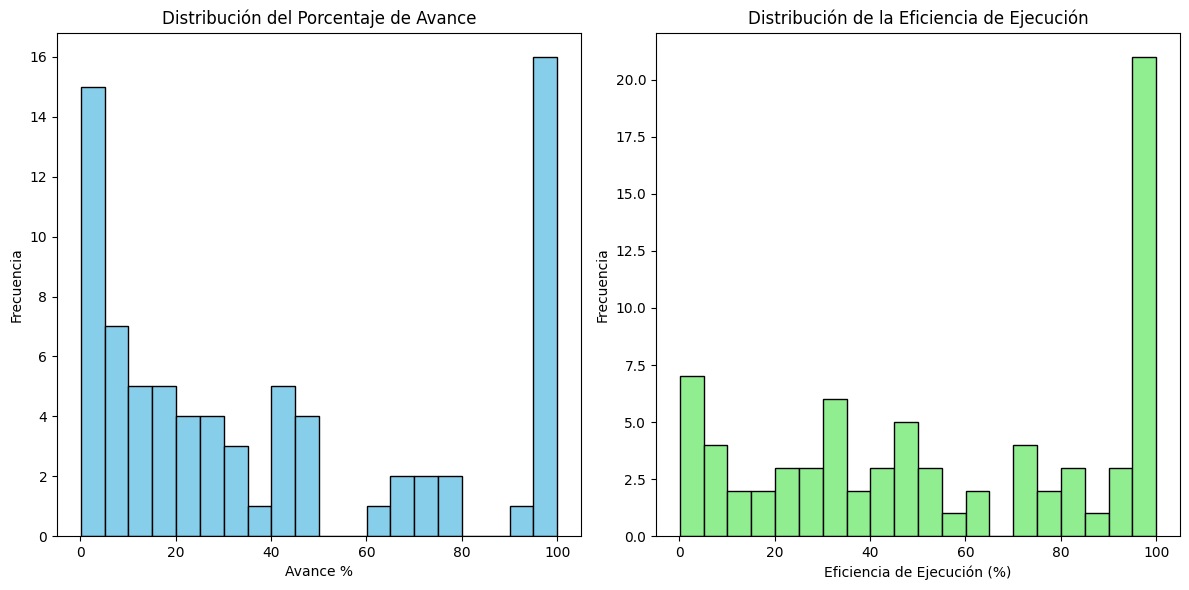

In [19]:
# Filtrar proyectos con avance mayor a 0%
proyectos_relevantes = data[data["Avance %"] > 0]

# Calcular eficiencia de ejecución
proyectos_relevantes["Eficiencia de Ejecución"] = (proyectos_relevantes["Ejecución"] / proyectos_relevantes["PIM"]) * 100

# Verificar los proyectos filtrados
print("Proyectos relevantes (primeras filas):")
print(proyectos_relevantes.head())

# Visualización: Distribución del avance y la ejecución
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histograma del porcentaje de avance
plt.subplot(1, 2, 1)
plt.hist(proyectos_relevantes["Avance %"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución del Porcentaje de Avance")
plt.xlabel("Avance %")
plt.ylabel("Frecuencia")

# Histograma de la eficiencia de ejecución
plt.subplot(1, 2, 2)
plt.hist(proyectos_relevantes["Eficiencia de Ejecución"].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribución de la Eficiencia de Ejecución")
plt.xlabel("Eficiencia de Ejecución (%)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [21]:
# Mantener la columna 'Proyecto' junto con las características y el objetivo
data_modelo = proyectos_relevantes.dropna(subset=variables + [objetivo])

# Separar características (X), objetivo (y) y el nombre del proyecto
X = data_modelo[variables]
y = data_modelo[objetivo]
proyectos = data_modelo["Proyecto"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test, proyectos_train, proyectos_test = train_test_split(
    X, y, proyectos, test_size=0.2, random_state=42
)

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar los datos preparados con los nombres de los proyectos
print("Datos de entrenamiento (primeras filas):")
print(pd.DataFrame(X_train_scaled, columns=variables).head())
print("\nProyectos de entrenamiento (primeras filas):")
print(proyectos_train.head())
print("\nObjetivo de entrenamiento (primeras filas):")
print(y_train.head())

Datos de entrenamiento (primeras filas):
        PIA       PIM  Certificación  Compromiso Anual  Ejecución
0  0.000000  0.006262       0.003994          0.003994   0.002984
1  0.000000  0.003140       0.003204          0.003204   0.003385
2  0.000000  0.026212       0.025917          0.025917   0.027363
3  0.271157  0.287642       0.169584          0.169584   0.150620
4  0.000000  0.003372       0.003441          0.003441   0.003636

Proyectos de entrenamiento (primeras filas):
16    2300713: CREACION DEL SERVICIO EDUCATIVO DE ED...
9     2189742: MEJORAMIENTO DEL CENTRO DE EDUCACION ...
56    2550271: MEJORAMIENTO DEL SERVICIO EDUCATIVO D...
37    2456809: MEJORAMIENTO Y AMPLIACION DEL SERVICI...
51    2550254: MEJORAMIENTO DEL SERVICIO EDUCATIVO D...
Name: Proyecto, dtype: object

Objetivo de entrenamiento (primeras filas):
16     45.0
9     100.0
56     94.4
37     48.2
51    100.0
Name: Avance %, dtype: float64


In [23]:
import numpy as np

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Proyecto": proyectos_test.values,
    "Avance Real %": y_test.values,
    "Avance Predicho %": predicciones,
    "Error Absoluto": np.abs(y_test.values - predicciones)
})

# Ordenar por el error absoluto para identificar los proyectos con mayor discrepancia
resultados_ordenados = resultados.sort_values(by="Error Absoluto", ascending=False)

# Mostrar las primeras filas de los resultados
print("Resultados del modelo (primeros proyectos):")
print(resultados_ordenados.head())

Resultados del modelo (primeros proyectos):
                                             Proyecto  Avance Real %  \
2   2302495: CREACION DEL SERVICIO DE EDUCACION IN...           46.0   
1   2550320: MEJORAMIENTO DEL SERVICIO EDUCATIVO D...          100.0   
8   2590995: MEJORAMIENTO DE LOS SERVICIOS OPERATI...            0.4   
4   2585553: MEJORAMIENTO DEL SERVICIO DE EDUCACIO...            1.9   
11  2653416: MEJORAMIENTO DE LOS SERVICIOS EDUCACI...           69.7   

    Avance Predicho %  Error Absoluto  
2              92.602          46.602  
1              65.771          34.229  
8              25.582          25.182  
4              23.559          21.659  
11             48.322          21.378  


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Recargar los datos desde el archivo
columnas = [
    "Proyecto",
    "PIA",
    "PIM",
    "Certificación",
    "Compromiso Anual",
    "Ejecución",
    "Devengado",
    "Girado",
    "Avance %"
]
data = pd.read_excel('Prueba.xlsx', skiprows=14, names=columnas)

# Eliminar filas vacías o irrelevantes
data = data.dropna(subset=["Proyecto"])

# Convertir columnas numéricas a tipo float
def convertir_a_numero(valor):
    try:
        return float(str(valor).replace(",", "").replace(" ", "").strip())
    except ValueError:
        return None

columnas_numericas = ["PIA", "PIM", "Certificación", "Compromiso Anual", "Ejecución", "Devengado", "Girado", "Avance %"]
for col in columnas_numericas:
    data[col] = data[col].apply(convertir_a_numero)

# Filtrar proyectos con avance mayor a 0%
proyectos_relevantes = data[data["Avance %"] > 0]

# Seleccionar variables relevantes
variables = ["PIA", "PIM", "Certificación", "Compromiso Anual", "Ejecución"]
objetivo = "Avance %"

# Eliminar filas con valores faltantes en las columnas seleccionadas
data_modelo = proyectos_relevantes.dropna(subset=variables + [objetivo])

# Separar características (X), objetivo (y) y el nombre del proyecto
X = data_modelo[variables]
y = data_modelo[objetivo]
proyectos = data_modelo["Proyecto"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test, proyectos_train, proyectos_test = train_test_split(
    X, y, proyectos, test_size=0.2, random_state=42
)

# Normalizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Hacer predicciones
predicciones = rf_model.predict(X_test_scaled)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    "Proyecto": proyectos_test.values,
    "Avance Real %": y_test.values,
    "Avance Predicho %": predicciones,
    "Error Absoluto": np.abs(y_test.values - predicciones)
})

# Ordenar por el error absoluto para identificar los proyectos con mayor discrepancia
resultados_ordenados = resultados.sort_values(by="Error Absoluto", ascending=False)

# Mostrar las primeras filas de los resultados
print("Resultados del modelo (primeros proyectos):")
print(resultados_ordenados.head())

Resultados del modelo (primeros proyectos):
                                             Proyecto  Avance Real %  \
2   2302495: CREACION DEL SERVICIO DE EDUCACION IN...           46.0   
1   2550320: MEJORAMIENTO DEL SERVICIO EDUCATIVO D...          100.0   
8   2590995: MEJORAMIENTO DE LOS SERVICIOS OPERATI...            0.4   
4   2585553: MEJORAMIENTO DEL SERVICIO DE EDUCACIO...            1.9   
11  2653416: MEJORAMIENTO DE LOS SERVICIOS EDUCACI...           69.7   

    Avance Predicho %  Error Absoluto  
2              92.602          46.602  
1              65.771          34.229  
8              25.582          25.182  
4              23.559          21.659  
11             48.322          21.378  
